In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.tree import export_graphviz 
import graphviz 
import warnings
warnings.filterwarnings('ignore')
import matplotlib
plt.rc('font', family = 'Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
data = pd.read_csv("전처리 최종.csv",encoding='euc_kr')

In [3]:
data.head()

,기간,지역,발생건수,사망자수,부상자수,맑음,흐림,비,안개,눈,...,인구,14세 이하,15~20세,21~30세,31~40세,41~50세,51~60세,61-64세,65~70세,71세이상
0,2010,종로구,1436.0,19.0,2009.0,1104.0,142.0,148.0,0,23.0,...,179362,51.0,111.0,431.0,430.0,418.0,374.0,66,83.0,64.0
1,2010,중구,1540.0,7.0,2152.0,1238.0,159.0,126.0,0,15.0,...,141200,33.0,101.0,483.0,470.0,482.0,368.0,88,91.0,43.0
2,2010,용산구,1245.0,15.0,1738.0,962.0,70.0,124.0,1,26.5,...,257143,54.0,88.0,376.0,410.0,340.0,293.0,74,54.0,64.0
3,2010,성동구,1097.0,15.0,1528.0,896.0,77.0,98.0,1,15.0,...,316892,60.0,95.0,373.0,304.0,314.0,247.0,50,61.0,39.0
4,2010,광진구,1540.0,17.0,2212.0,1267.0,129.0,125.0,0,18.0,...,388775,106.0,160.0,525.0,443.0,451.0,353.0,68,64.0,59.0


In [4]:
data_2=pd.read_csv("도로교통공단.csv",encoding='euc_kr')

In [5]:
data_2 = data_2.groupby(['발생년도','시군구']).mean()

In [6]:
data_2_1=data_2.iloc[:,7:]

In [7]:
data_2_2=data_2.iloc[:,:2]

In [8]:
data_2_3=pd.concat([data_2_1,data_2_2],axis=1)

In [9]:
data_2_3 = data_2_3.reset_index()

In [10]:
data_2_3

,발생년도,시군구,도로길이(m),차로수(편도),(km)당 위험도지수값(평균),위험도지수등급
0,2011,강남구,250.216270,2.301587,109.355820,1.642857
1,2011,강동구,275.107792,1.885714,103.537662,1.600000
2,2011,강북구,241.587269,1.661191,111.414784,1.772074
3,2011,강서구,235.707917,1.923136,64.438125,1.452729
4,2011,관악구,266.624013,1.985782,165.069510,1.928910
...,...,...,...,...,...,...
145,2016,용산구,277.059055,2.002625,103.854331,1.711286
146,2016,은평구,276.400000,1.667717,121.714961,1.785827
147,2016,종로구,242.746228,2.027435,158.411523,1.817558
148,2016,중구,184.601010,2.226010,163.510101,1.858586


In [11]:
data_2_3 = data_2_3.rename(columns={'발생년도':'기간','시군구':'지역'})

In [12]:
data_merge = pd.merge(data,data_2_3, left_on=['기간','지역'],right_on=['기간','지역'],how='left')

In [13]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275 entries, 0 to 274
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   기간                275 non-null    int64  
 1   지역                275 non-null    object 
 2   발생건수              275 non-null    float64
 3   사망자수              275 non-null    float64
 4   부상자수              275 non-null    float64
 5   맑음                275 non-null    float64
 6   흐림                275 non-null    float64
 7   비                 275 non-null    float64
 8   안개                275 non-null    int64  
 9   눈                 275 non-null    float64
 10  기타/불명             275 non-null    float64
 11  교통안전지수            275 non-null    float64
 12  인구밀도              275 non-null    int64  
 13  인구                275 non-null    int64  
 14  14세 이하            275 non-null    float64
 15  15~20세            275 non-null    float64
 16  21~30세            275 non-null    float64
 1

In [14]:
data_a=data_merge.loc[25:174]

In [15]:
data_a

,기간,지역,발생건수,사망자수,부상자수,맑음,흐림,비,안개,눈,...,31~40세,41~50세,51~60세,61-64세,65~70세,71세이상,도로길이(m),차로수(편도),(km)당 위험도지수값(평균),위험도지수등급
25,2011,종로구,1421.00,14.0,1994.0,1169.00,109.0,120.0,0,5.0,...,411.0,395.00,384.00,84,84.0,73.0,242.746228,2.027435,118.930041,1.695473
26,2011,중구,1497.00,13.0,2025.0,1253.00,122.0,117.0,0,3.0,...,446.0,414.00,387.00,86,80.0,63.0,184.601010,2.226010,154.505051,1.805556
27,2011,용산구,1170.00,9.0,1704.0,922.00,64.0,121.0,1,7.0,...,398.0,321.00,247.00,77,55.0,43.0,277.059055,2.002625,66.703412,1.524934
28,2011,성동구,1154.00,21.0,1603.0,1012.00,60.0,68.0,0,3.0,...,365.0,335.00,238.00,69,63.0,51.0,257.355444,1.906133,122.535670,1.664581
29,2011,광진구,1430.00,23.0,2033.0,1165.00,91.0,142.0,0,7.0,...,430.0,418.00,319.00,74,67.0,46.0,273.356884,2.039855,94.882246,1.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,2016,관악구,1408.00,19.0,1895.0,1216.00,37.0,68.0,0,5.0,...,340.0,301.00,317.00,91,85.0,90.0,266.624013,1.985782,160.225908,1.944708
171,2016,서초구,2313.00,16.0,3473.0,2101.00,55.0,146.0,0,7.0,...,686.5,657.00,600.00,184,160.0,113.0,297.536008,2.421811,127.643004,1.860082
172,2016,강남구,2506.25,12.0,3529.5,2201.75,85.0,221.5,1,12.0,...,686.5,690.75,664.25,249,176.0,153.0,250.216270,2.301587,140.680556,1.876984
173,2016,송파구,2506.25,14.0,3529.5,2201.75,100.0,156.0,3,8.0,...,686.5,623.00,664.25,221,147.0,147.0,254.215781,2.298712,106.261675,1.757649


# 의사결정나무

In [16]:
from sklearn.tree import DecisionTreeRegressor    # 회귀나무 함수
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [17]:
data_a=data_a.reset_index()

In [18]:
data_a = data_a.drop(['기간','지역','index'],axis=1)

In [19]:
col=data_a.columns

In [20]:
scaler=StandardScaler()
data_a=scaler.fit_transform(data_a)

In [21]:
data_a=pd.DataFrame(data=data_a,columns=col)

<AxesSubplot:>

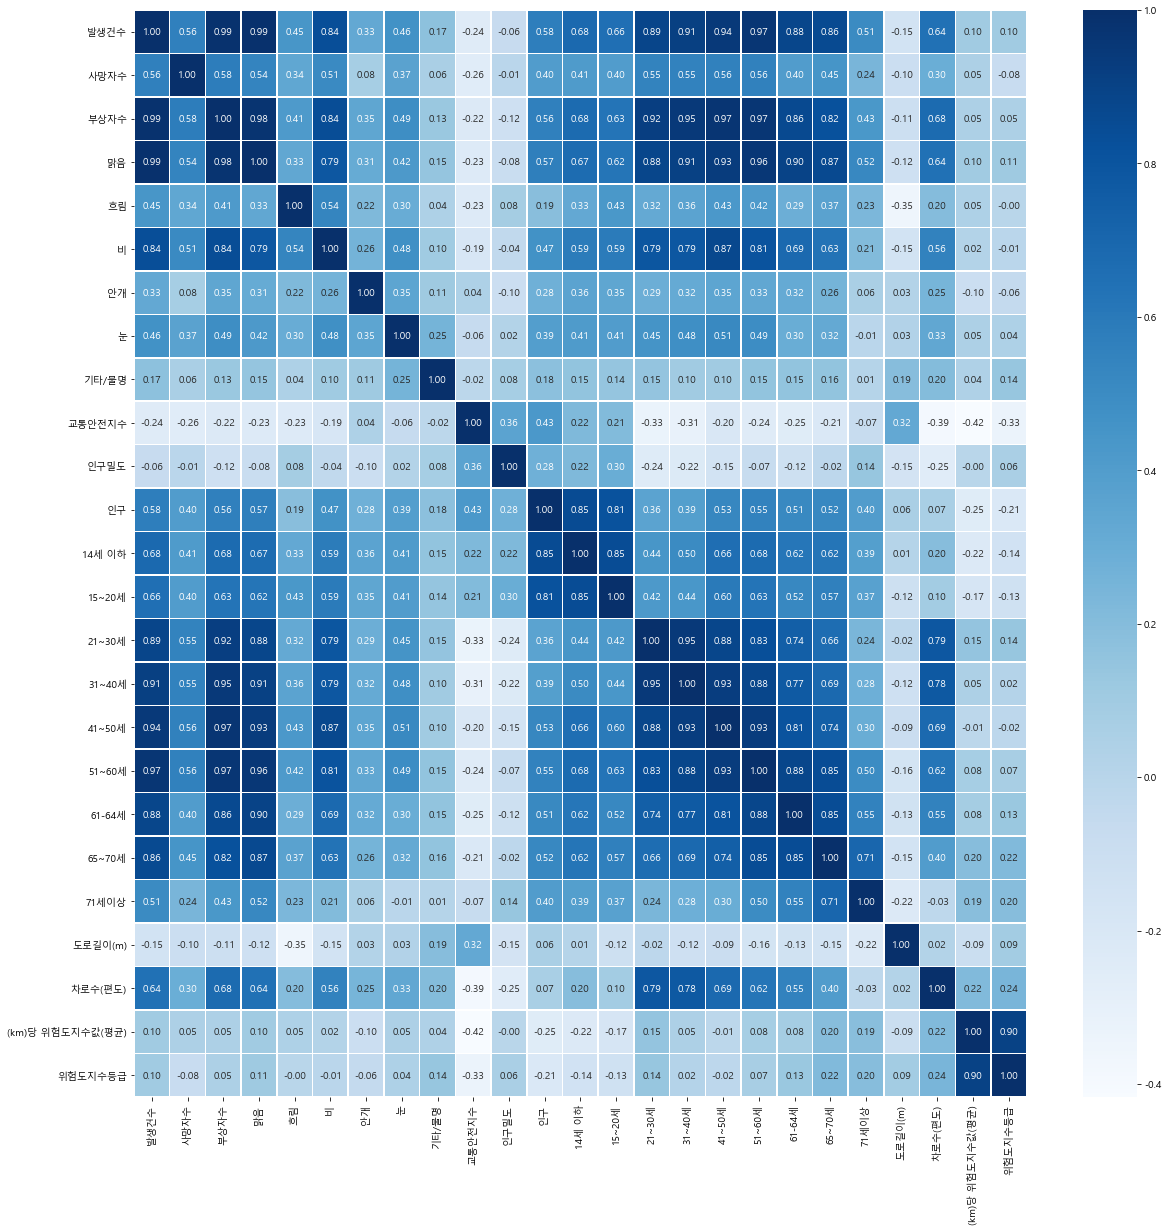

In [22]:
#각 변수별 상관계수
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(data = data_a.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [23]:
y = data_a['발생건수']
x = data_a.drop(['발생건수'],axis=1)

In [24]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3, random_state=42)

In [25]:
tree_model = DecisionTreeRegressor(max_depth=5,criterion='mse')
tree_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [26]:
#성능지표
y_preds = tree_model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2_points = r2_score(y_test, y_preds)
print("RMSE:", rmse)
print("R^2:", r2_points)

RMSE: 0.24099820237753583
R^2: 0.9384365598170336


In [27]:
estimator = DecisionTreeRegressor()
param_grid = {'criterion':['mse'], 'max_depth':[3,4,5,6,7,8,9]}
grid = GridSearchCV(estimator, param_grid=param_grid) 
grid.fit(x_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.970017709552344
{'criterion': 'mse', 'max_depth': 7}


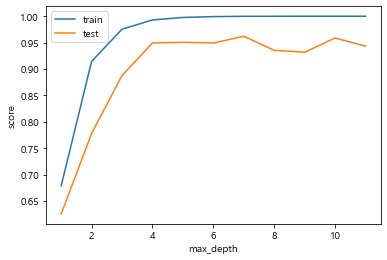

In [28]:
# 최적의 가지 수 구하기
f_train=[]
f_test=[]
for i in range(1,12):
    tr = DecisionTreeRegressor(max_depth=i,criterion='mse').fit(x_train,y_train)
    f_train.append(tr.score(x_train,y_train))
    f_test.append(tr.score(x_test,y_test))
plt.plot(range(1,12),f_train,label='train')
plt.plot(range(1,12),f_test, label='test')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.legend()
plt.show()

# 인공신경망

In [29]:
import random
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

### 활성화함수 relu

In [30]:
def build_model(num_input=1):
    model = Sequential()
    model.add(Dense(30, activation='relu', input_dim=num_input))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(1, activation='linear'))
        
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

In [31]:
x_train.shape

(105, 24)

In [32]:
model = build_model(num_input=24)
history=model.fit(x_train, y_train, batch_size=10, epochs=50, validation_split=0.25, verbose=2)

Epoch 1/50
8/8 - 1s - loss: 1.8935 - mse: 1.8935 - val_loss: 0.9055 - val_mse: 0.9055
Epoch 2/50
8/8 - 0s - loss: 1.2676 - mse: 1.2676 - val_loss: 0.5988 - val_mse: 0.5988
Epoch 3/50
8/8 - 0s - loss: 0.7846 - mse: 0.7846 - val_loss: 0.4318 - val_mse: 0.4318
Epoch 4/50
8/8 - 0s - loss: 0.5030 - mse: 0.5030 - val_loss: 0.3215 - val_mse: 0.3215
Epoch 5/50
8/8 - 0s - loss: 0.3096 - mse: 0.3096 - val_loss: 0.2443 - val_mse: 0.2443
Epoch 6/50
8/8 - 0s - loss: 0.1852 - mse: 0.1852 - val_loss: 0.1939 - val_mse: 0.1939
Epoch 7/50
8/8 - 0s - loss: 0.1307 - mse: 0.1307 - val_loss: 0.1493 - val_mse: 0.1493
Epoch 8/50
8/8 - 0s - loss: 0.0977 - mse: 0.0977 - val_loss: 0.1253 - val_mse: 0.1253
Epoch 9/50
8/8 - 0s - loss: 0.0799 - mse: 0.0799 - val_loss: 0.1146 - val_mse: 0.1146
Epoch 10/50
8/8 - 0s - loss: 0.0667 - mse: 0.0667 - val_loss: 0.1067 - val_mse: 0.1067
Epoch 11/50
8/8 - 0s - loss: 0.0570 - mse: 0.0570 - val_loss: 0.1027 - val_mse: 0.1027
Epoch 12/50
8/8 - 0s - loss: 0.0492 - mse: 0.0492 - 

In [33]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.0479 - mse: 0.0479


[0.047944240272045135, 0.047944240272045135]

In [43]:
a=pd.DataFrame(history.history)
a['mse-val_mse'] = a['mse']-a['val_mse']
b=a.index[abs(a['mse-val_mse'])==min(abs(a['mse-val_mse']))].tolist()
print('train과 validation의 mse 지표 차가 최소인 epoch :',b)
print(a.loc[b[0]])

train과 validation의 mse 지표 차가 최소인 epoch : [5]
loss           0.185211
mse            0.185211
val_loss       0.193914
val_mse        0.193914
mse-val_mse   -0.008702
Name: 5, dtype: float64


In [44]:
def plot_loss_curve(total_epoch=10, start=1):
    plt.figure(figsize=(15, 5))
    plt.plot(range(start, total_epoch +1), history.history['loss'][start-1:total_epoch], label='Train')
    plt.plot(range(start, total_epoch +1), history.history['val_loss'][start-1:total_epoch], label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('mse')
    plt.legend()
    plt.show()

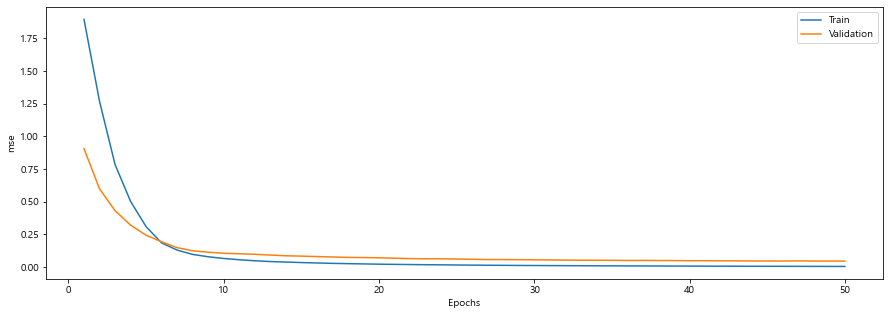

In [45]:
plot_loss_curve(total_epoch=50, start=1)

### 활성화 함수 tanh

In [46]:
def build_model_2(num_input=1):
    model = Sequential()
    model.add(Dense(30, activation='tanh', input_dim=num_input))
    model.add(Dense(15, activation='tanh'))
    model.add(Dense(1, activation='linear'))
        
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

In [47]:
model_tanh = build_model_2(num_input=24)

In [48]:
history=model_tanh.fit(x_train, y_train, batch_size=10, epochs=50, validation_split=0.25, verbose=2)

Epoch 1/50
8/8 - 1s - loss: 1.2934 - mse: 1.2934 - val_loss: 0.5767 - val_mse: 0.5767
Epoch 2/50
8/8 - 0s - loss: 0.6665 - mse: 0.6665 - val_loss: 0.3997 - val_mse: 0.3997
Epoch 3/50
8/8 - 0s - loss: 0.3920 - mse: 0.3920 - val_loss: 0.3306 - val_mse: 0.3306
Epoch 4/50
8/8 - 0s - loss: 0.2816 - mse: 0.2816 - val_loss: 0.2742 - val_mse: 0.2742
Epoch 5/50
8/8 - 0s - loss: 0.2193 - mse: 0.2193 - val_loss: 0.2137 - val_mse: 0.2137
Epoch 6/50
8/8 - 0s - loss: 0.1698 - mse: 0.1698 - val_loss: 0.1594 - val_mse: 0.1594
Epoch 7/50
8/8 - 0s - loss: 0.1302 - mse: 0.1302 - val_loss: 0.1244 - val_mse: 0.1244
Epoch 8/50
8/8 - 0s - loss: 0.1042 - mse: 0.1042 - val_loss: 0.1086 - val_mse: 0.1086
Epoch 9/50
8/8 - 0s - loss: 0.0876 - mse: 0.0876 - val_loss: 0.0983 - val_mse: 0.0983
Epoch 10/50
8/8 - 0s - loss: 0.0750 - mse: 0.0750 - val_loss: 0.0912 - val_mse: 0.0912
Epoch 11/50
8/8 - 0s - loss: 0.0642 - mse: 0.0642 - val_loss: 0.0851 - val_mse: 0.0851
Epoch 12/50
8/8 - 0s - loss: 0.0559 - mse: 0.0559 - 

In [49]:
model_tanh.evaluate(x_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.0405 - mse: 0.0405


[0.04049680009484291, 0.04049680009484291]

In [50]:
a=pd.DataFrame(history.history)
a['mse-val_mse'] = a['mse']-a['val_mse']
b=a.index[abs(a['mse-val_mse'])==min(abs(a['mse-val_mse']))].tolist()
print('train과 validation의 mse 지표 차가 최소인 epoch :',b)
print(a.loc[b[0]])

train과 validation의 mse 지표 차가 최소인 epoch : [7]
loss           0.104227
mse            0.104227
val_loss       0.108554
val_mse        0.108554
mse-val_mse   -0.004327
Name: 7, dtype: float64


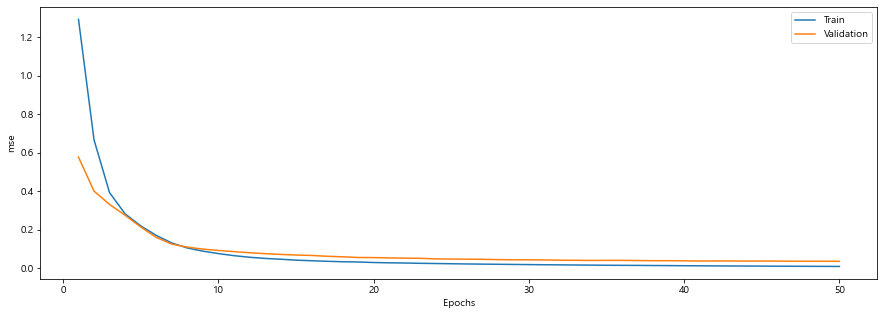

In [51]:
plot_loss_curve(total_epoch=50, start=1)

### 활성화 함수 elu

In [52]:
def build_model_3(num_input=1):
    model = Sequential()
    model.add(Dense(30, activation='elu', input_dim=num_input))
    model.add(Dense(15, activation='elu'))
    model.add(Dense(1, activation='linear'))
        
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

In [53]:
model_elu = build_model_3(num_input=24)
history=model_elu.fit(x_train, y_train, batch_size=10, epochs=50, validation_split=0.25, verbose=2)

Epoch 1/50
8/8 - 1s - loss: 4.8194 - mse: 4.8194 - val_loss: 1.9729 - val_mse: 1.9729
Epoch 2/50
8/8 - 0s - loss: 2.3784 - mse: 2.3784 - val_loss: 1.1021 - val_mse: 1.1021
Epoch 3/50
8/8 - 0s - loss: 1.2426 - mse: 1.2426 - val_loss: 0.6825 - val_mse: 0.6825
Epoch 4/50
8/8 - 0s - loss: 0.7787 - mse: 0.7787 - val_loss: 0.5390 - val_mse: 0.5390
Epoch 5/50
8/8 - 0s - loss: 0.5484 - mse: 0.5484 - val_loss: 0.4212 - val_mse: 0.4212
Epoch 6/50
8/8 - 0s - loss: 0.4213 - mse: 0.4213 - val_loss: 0.3221 - val_mse: 0.3221
Epoch 7/50
8/8 - 0s - loss: 0.3220 - mse: 0.3220 - val_loss: 0.2484 - val_mse: 0.2484
Epoch 8/50
8/8 - 0s - loss: 0.2699 - mse: 0.2699 - val_loss: 0.1917 - val_mse: 0.1917
Epoch 9/50
8/8 - 0s - loss: 0.2168 - mse: 0.2168 - val_loss: 0.1608 - val_mse: 0.1608
Epoch 10/50
8/8 - 0s - loss: 0.1876 - mse: 0.1876 - val_loss: 0.1399 - val_mse: 0.1399
Epoch 11/50
8/8 - 0s - loss: 0.1644 - mse: 0.1644 - val_loss: 0.1277 - val_mse: 0.1277
Epoch 12/50
8/8 - 0s - loss: 0.1444 - mse: 0.1444 - 

In [54]:
model_elu.evaluate(x_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.0321 - mse: 0.0321


[0.032144539058208466, 0.032144539058208466]

In [56]:
a=pd.DataFrame(history.history)
a['mse-val_mse'] = a['mse']-a['val_mse']
b=a.index[abs(a['mse-val_mse'])==min(abs(a['mse-val_mse']))].tolist()
print('train과 validation의 mse 지표 차가 최소인 epoch :',b)
print(a.loc[b[0]])

train과 validation의 mse 지표 차가 최소인 epoch : [16]
loss           0.087439
mse            0.087439
val_loss       0.090861
val_mse        0.090861
mse-val_mse   -0.003422
Name: 16, dtype: float64


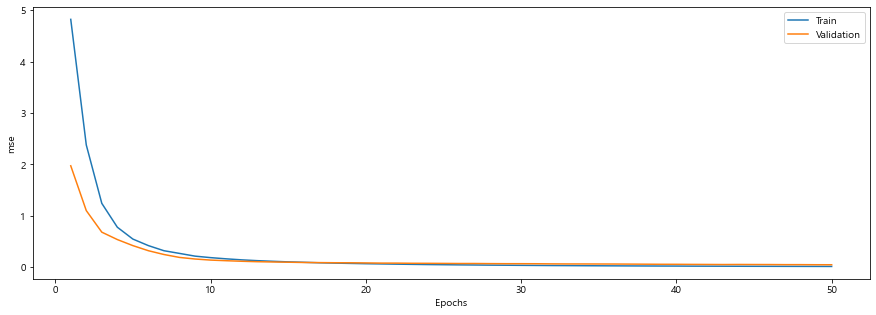

In [57]:
plot_loss_curve(total_epoch=50, start=1)

### build_model과 비교 optimizer= stochastic gradient decent

In [58]:
def build_model_4(num_input=1):
    model = Sequential()
    model.add(Dense(30, activation='relu', input_dim=num_input))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(1, activation='linear'))
        
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    return model

In [59]:
model_opt_sgd= build_model_4(num_input=24)
history=model_opt_sgd.fit(x_train, y_train, batch_size=10, epochs=50, validation_split=0.25, verbose=2)

Epoch 1/50
8/8 - 0s - loss: 0.4611 - mse: 0.4611 - val_loss: 0.2382 - val_mse: 0.2382
Epoch 2/50
8/8 - 0s - loss: 0.2423 - mse: 0.2423 - val_loss: 0.2207 - val_mse: 0.2207
Epoch 3/50
8/8 - 0s - loss: 0.1690 - mse: 0.1690 - val_loss: 0.1756 - val_mse: 0.1756
Epoch 4/50
8/8 - 0s - loss: 0.1293 - mse: 0.1293 - val_loss: 0.1540 - val_mse: 0.1540
Epoch 5/50
8/8 - 0s - loss: 0.1035 - mse: 0.1035 - val_loss: 0.1395 - val_mse: 0.1395
Epoch 6/50
8/8 - 0s - loss: 0.0852 - mse: 0.0852 - val_loss: 0.1158 - val_mse: 0.1158
Epoch 7/50
8/8 - 0s - loss: 0.0716 - mse: 0.0716 - val_loss: 0.1097 - val_mse: 0.1097
Epoch 8/50
8/8 - 0s - loss: 0.0621 - mse: 0.0621 - val_loss: 0.1075 - val_mse: 0.1075
Epoch 9/50
8/8 - 0s - loss: 0.0576 - mse: 0.0576 - val_loss: 0.1002 - val_mse: 0.1002
Epoch 10/50
8/8 - 0s - loss: 0.0497 - mse: 0.0497 - val_loss: 0.0915 - val_mse: 0.0915
Epoch 11/50
8/8 - 0s - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0893 - val_mse: 0.0893
Epoch 12/50
8/8 - 0s - loss: 0.0439 - mse: 0.0439 - 

In [61]:
a=pd.DataFrame(history.history)
a['mse-val_mse'] = a['mse']-a['val_mse']
b=a.index[abs(a['mse-val_mse'])==min(abs(a['mse-val_mse']))].tolist()
print('train과 validation의 mse 지표 차가 최소인 epoch :',b)
print(a.loc[b[0]])

train과 validation의 mse 지표 차가 최소인 epoch : [2]
loss           0.169005
mse            0.169005
val_loss       0.175607
val_mse        0.175607
mse-val_mse   -0.006602
Name: 2, dtype: float64


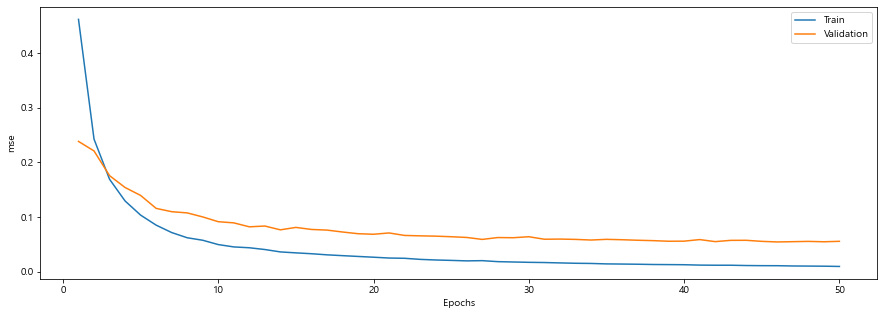

In [62]:
plot_loss_curve(total_epoch=50, start=1)

### hidden layer 3, 4개

In [63]:
#3개
def build_model_5(num_input=1):
    model = Sequential()
    model.add(Dense(30, activation='relu', input_dim=num_input))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(1, activation='linear'))
        
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

In [64]:
model_hidden3= build_model_5(num_input=24)
history=model_hidden3.fit(x_train, y_train, batch_size=10, epochs=50, validation_split=0.25, verbose=2)

Epoch 1/50
8/8 - 1s - loss: 1.0116 - mse: 1.0116 - val_loss: 0.4287 - val_mse: 0.4287
Epoch 2/50
8/8 - 0s - loss: 0.6930 - mse: 0.6930 - val_loss: 0.3076 - val_mse: 0.3076
Epoch 3/50
8/8 - 0s - loss: 0.5130 - mse: 0.5130 - val_loss: 0.2363 - val_mse: 0.2363
Epoch 4/50
8/8 - 0s - loss: 0.3930 - mse: 0.3930 - val_loss: 0.1744 - val_mse: 0.1744
Epoch 5/50
8/8 - 0s - loss: 0.2793 - mse: 0.2793 - val_loss: 0.1160 - val_mse: 0.1160
Epoch 6/50
8/8 - 0s - loss: 0.1738 - mse: 0.1738 - val_loss: 0.0773 - val_mse: 0.0773
Epoch 7/50
8/8 - 0s - loss: 0.1001 - mse: 0.1001 - val_loss: 0.0568 - val_mse: 0.0568
Epoch 8/50
8/8 - 0s - loss: 0.0583 - mse: 0.0583 - val_loss: 0.0494 - val_mse: 0.0494
Epoch 9/50
8/8 - 0s - loss: 0.0432 - mse: 0.0432 - val_loss: 0.0476 - val_mse: 0.0476
Epoch 10/50
8/8 - 0s - loss: 0.0343 - mse: 0.0343 - val_loss: 0.0449 - val_mse: 0.0449
Epoch 11/50
8/8 - 0s - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0425 - val_mse: 0.0425
Epoch 12/50
8/8 - 0s - loss: 0.0219 - mse: 0.0219 - 

In [65]:
a=pd.DataFrame(history.history)
a['mse-val_mse'] = a['mse']-a['val_mse']
b=a.index[abs(a['mse-val_mse'])==min(abs(a['mse-val_mse']))].tolist()
print('train과 validation의 mse 지표 차가 최소인 epoch :',b)
print(a.loc[b[0]])

train과 validation의 mse 지표 차가 최소인 epoch : [8]
loss           0.043184
mse            0.043184
val_loss       0.047624
val_mse        0.047624
mse-val_mse   -0.004441
Name: 8, dtype: float64


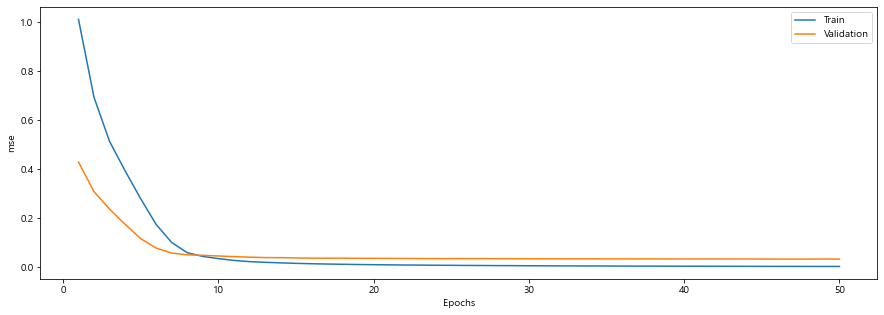

In [66]:
plot_loss_curve(total_epoch=50, start=1)

In [68]:
#4개
def build_model_6(num_input=1):
    model = Sequential()
    model.add(Dense(30, activation='relu', input_dim=num_input))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(1, activation='linear'))
        
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

In [69]:
model_hidden4= build_model_6(num_input=24)
history=model_hidden4.fit(x_train, y_train, batch_size=10, epochs=50, validation_split=0.25, verbose=2)

Epoch 1/50
8/8 - 1s - loss: 0.8204 - mse: 0.8204 - val_loss: 0.3767 - val_mse: 0.3767
Epoch 2/50
8/8 - 0s - loss: 0.6011 - mse: 0.6011 - val_loss: 0.2857 - val_mse: 0.2857
Epoch 3/50
8/8 - 0s - loss: 0.4175 - mse: 0.4175 - val_loss: 0.2234 - val_mse: 0.2234
Epoch 4/50
8/8 - 0s - loss: 0.3068 - mse: 0.3068 - val_loss: 0.1752 - val_mse: 0.1752
Epoch 5/50
8/8 - 0s - loss: 0.2025 - mse: 0.2025 - val_loss: 0.1257 - val_mse: 0.1257
Epoch 6/50
8/8 - 0s - loss: 0.1117 - mse: 0.1117 - val_loss: 0.1004 - val_mse: 0.1004
Epoch 7/50
8/8 - 0s - loss: 0.0629 - mse: 0.0629 - val_loss: 0.0931 - val_mse: 0.0931
Epoch 8/50
8/8 - 0s - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0894 - val_mse: 0.0894
Epoch 9/50
8/8 - 0s - loss: 0.0373 - mse: 0.0373 - val_loss: 0.0798 - val_mse: 0.0798
Epoch 10/50
8/8 - 0s - loss: 0.0286 - mse: 0.0286 - val_loss: 0.0717 - val_mse: 0.0717
Epoch 11/50
8/8 - 0s - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0690 - val_mse: 0.0690
Epoch 12/50
8/8 - 0s - loss: 0.0186 - mse: 0.0186 - 

In [70]:
a=pd.DataFrame(history.history)
a['mse-val_mse'] = a['mse']-a['val_mse']
b=a.index[abs(a['mse-val_mse'])==min(abs(a['mse-val_mse']))].tolist()
print('train과 validation의 mse 지표 차가 최소인 epoch :',b)
print(a.loc[b[0]])

train과 validation의 mse 지표 차가 최소인 epoch : [5]
loss           0.111655
mse            0.111655
val_loss       0.100408
val_mse        0.100408
mse-val_mse    0.011247
Name: 5, dtype: float64


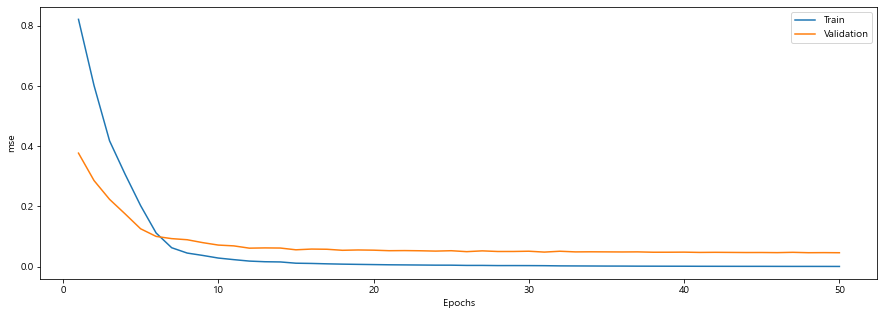

In [71]:
plot_loss_curve(total_epoch=50, start=1)